# Data Analysis for final score predictor
This notebook focuses on analyzing the data for the final score predictor, so that I am able to discern the features that are predictive of the final score.

## Packages
First, I will import the relevant packages.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Import data
The data is stored in the match_data.csv file stored in the Resources folder

In [12]:
# Load data
match_data = pd.read_csv(r"../Resources/match_data.csv")
match_data.head()

C:\Users\athar\AppData\Local\Temp\ipykernel_9484\2703755179.py:2: DtypeWarning: Columns (15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  match_data = pd.read_csv(r"../Resources/match_data.csv")


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,batter,bowler,non_striker,batter runs,extra runs,total runs,score,extras,wickets,out,Total Wickets,non_boundary,review,replacements
0,1381452,Austria,0,0,M Simpson-Parker,Ghulam Ahmadi,Iqbal Hossain,0,0,0,0,NaN,NaN,0,0,NaN,NaN,NaN
1,1381452,Austria,0,1,M Simpson-Parker,Ghulam Ahmadi,Iqbal Hossain,4,0,4,4,NaN,NaN,0,0,NaN,NaN,NaN
2,1381452,Austria,0,2,M Simpson-Parker,Ghulam Ahmadi,Iqbal Hossain,0,0,0,4,NaN,NaN,0,0,NaN,NaN,NaN
3,1381452,Austria,0,3,M Simpson-Parker,Ghulam Ahmadi,Iqbal Hossain,0,0,0,4,NaN,NaN,0,0,NaN,NaN,NaN
4,1381452,Austria,0,4,M Simpson-Parker,Ghulam Ahmadi,Iqbal Hossain,1,0,1,5,NaN,NaN,0,0,NaN,NaN,NaN


In [13]:
# Rename the columns
match_data.rename(columns = {"Unnamed: 0" : "match code", "Unnamed: 1": "country", "Unnamed: 2": "over", "Unnamed: 3": "ball"}, inplace = True)
match_data.head()

,match code,country,over,ball,batter,bowler,non_striker,batter runs,extra runs,total runs,score,extras,wickets,out,Total Wickets,non_boundary,review,replacements
0,1381452,Austria,0,0,M Simpson-Parker,Ghulam Ahmadi,Iqbal Hossain,0,0,0,0,NaN,NaN,0,0,NaN,NaN,NaN
1,1381452,Austria,0,1,M Simpson-Parker,Ghulam Ahmadi,Iqbal Hossain,4,0,4,4,NaN,NaN,0,0,NaN,NaN,NaN
2,1381452,Austria,0,2,M Simpson-Parker,Ghulam Ahmadi,Iqbal Hossain,0,0,0,4,NaN,NaN,0,0,NaN,NaN,NaN
3,1381452,Austria,0,3,M Simpson-Parker,Ghulam Ahmadi,Iqbal Hossain,0,0,0,4,NaN,NaN,0,0,NaN,NaN,NaN
4,1381452,Austria,0,4,M Simpson-Parker,Ghulam Ahmadi,Iqbal Hossain,1,0,1,5,NaN,NaN,0,0,NaN,NaN,NaN


## Labelling the data
Now that we have the data, let's label it with the final scores.

In [14]:
# Create a new column for final score, we want to predict this

final_scores = match_data.groupby(["match code", "country"]).last().reset_index()
match_data = match_data.merge(final_scores[["match code", "country", "score"]],
                                 on = ["match code", "country"], suffixes = ('', " final"))
match_data.rename(columns={'score final': 'final score'}, inplace=True)
match_data


,match code,country,over,ball,batter,bowler,non_striker,batter runs,extra runs,total runs,score,extras,wickets,out,Total Wickets,non_boundary,review,replacements,final score
0,1381452,Austria,0,0,M Simpson-Parker,Ghulam Ahmadi,Iqbal Hossain,0,0,0,0,NaN,NaN,0,0,NaN,NaN,NaN,121
1,1381452,Austria,0,1,M Simpson-Parker,Ghulam Ahmadi,Iqbal Hossain,4,0,4,4,NaN,NaN,0,0,NaN,NaN,NaN,121
2,1381452,Austria,0,2,M Simpson-Parker,Ghulam Ahmadi,Iqbal Hossain,0,0,0,4,NaN,NaN,0,0,NaN,NaN,NaN,121
3,1381452,Austria,0,3,M Simpson-Parker,Ghulam Ahmadi,Iqbal Hossain,0,0,0,4,NaN,NaN,0,0,NaN,NaN,NaN,121
4,1381452,Austria,0,4,M Simpson-Parker,Ghulam Ahmadi,Iqbal Hossain,1,0,1,5,NaN,NaN,0,0,NaN,NaN,NaN,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407784,211048,New Zealand,19,1,JW Wilson,GD McGrath,KD Mills,2,0,2,165,NaN,NaN,0,8,NaN,NaN,NaN,170
407785,211048,New Zealand,19,2,JW Wilson,GD McGrath,KD Mills,0,0,0,165,NaN,"[{'kind': 'bowled', 'player_out': 'JW Wilson'}]",1,9,NaN,NaN,NaN,170
407786,211048,New Zealand,19,3,DR Tuffey,GD McGrath,KD Mills,4,0,4,169,NaN,NaN,0,9,NaN,NaN,NaN,170
407787,211048,New Zealand,19,4,DR Tuffey,GD McGrath,KD Mills,1,0,1,170,NaN,NaN,0,9,NaN,NaN,NaN,170


## Final Score and Country

<Axes: title={'center': 'final score'}, ylabel='country'>

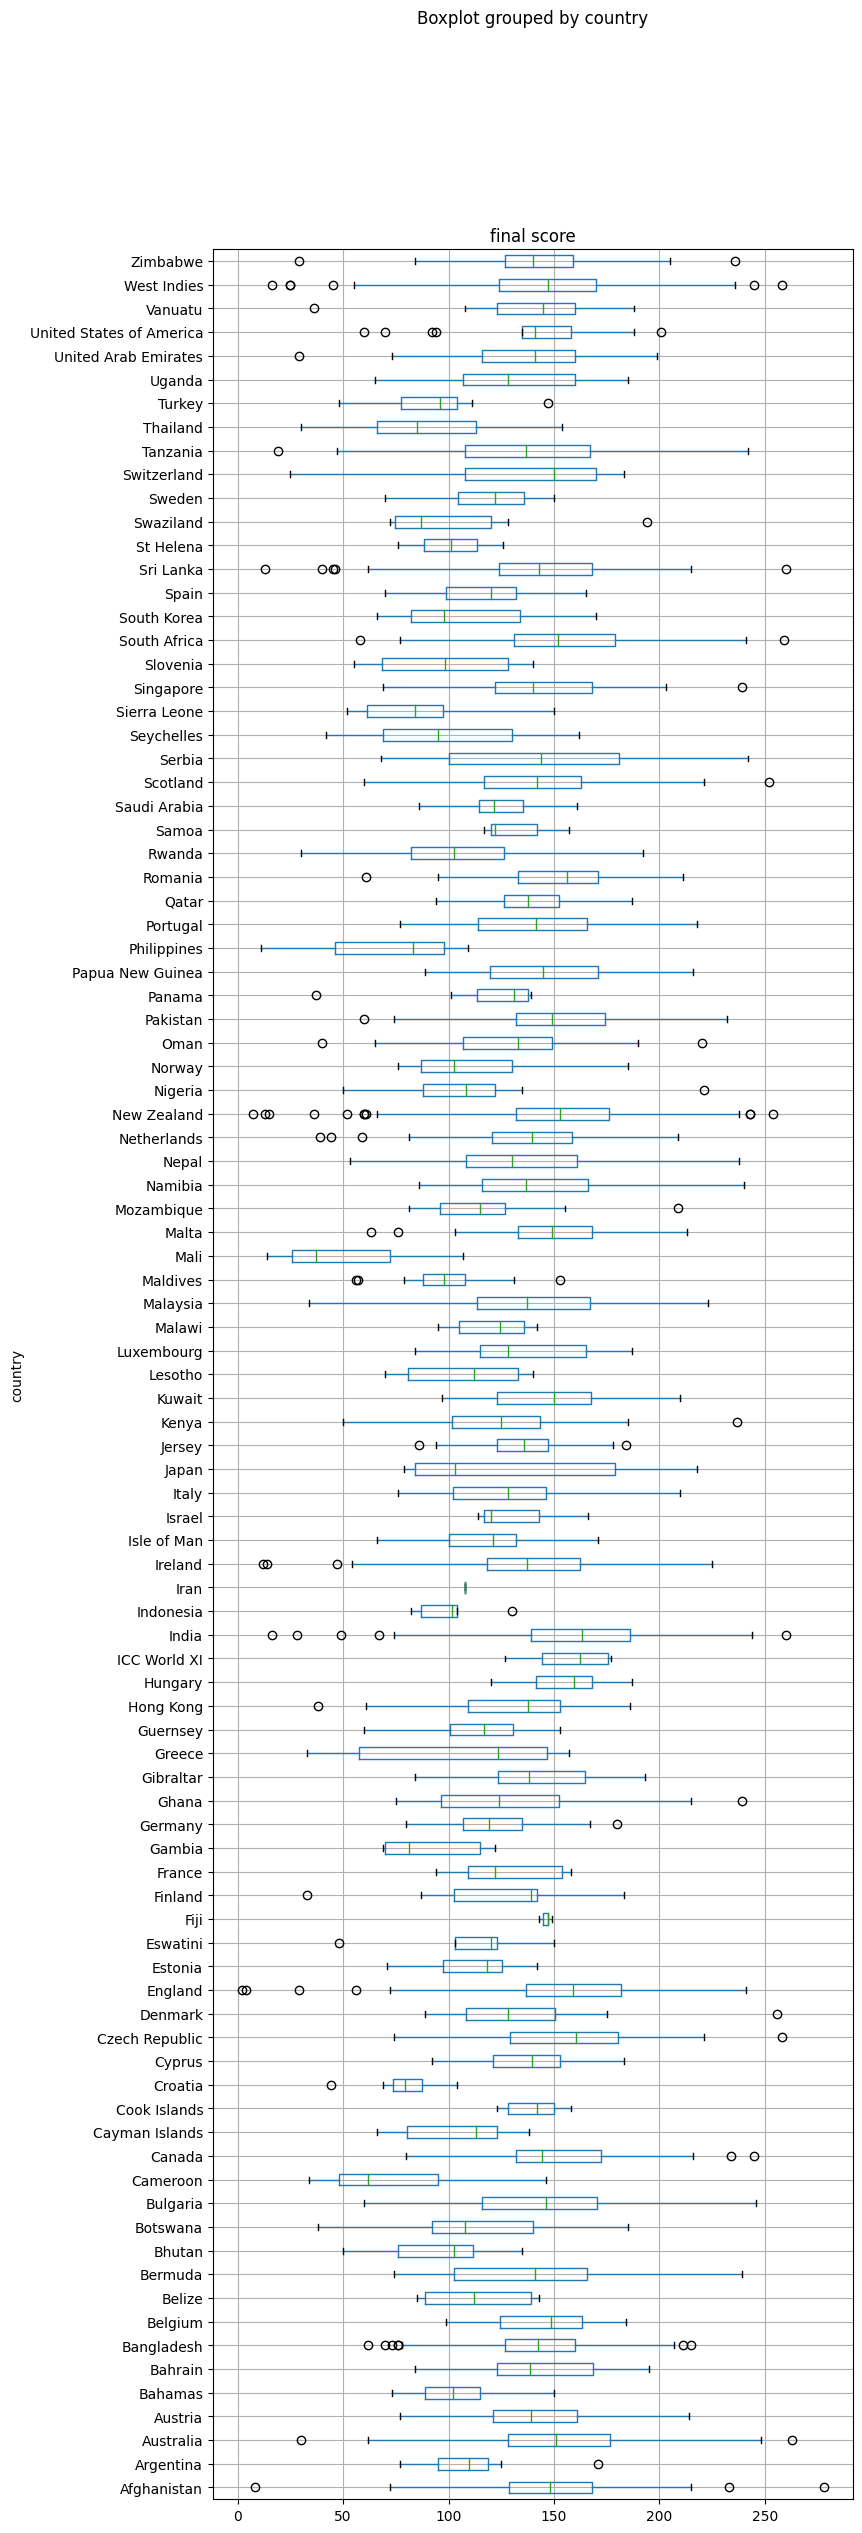

In [20]:
data = match_data[["match code", "country", "final score"]]
data = data.groupby(["match code","country","final score"]).first().reset_index()
data.drop(columns = ["match code"])
data.boxplot(column = "final score", by = "country", figsize = (8, 30), vert = False)

The above boxplot shows that the final score does depend a lot on the country, so we will use it as a feature.

## Total Wickets and Final Score

<Axes: title={'center': 'final score'}, xlabel='Total Wickets'>

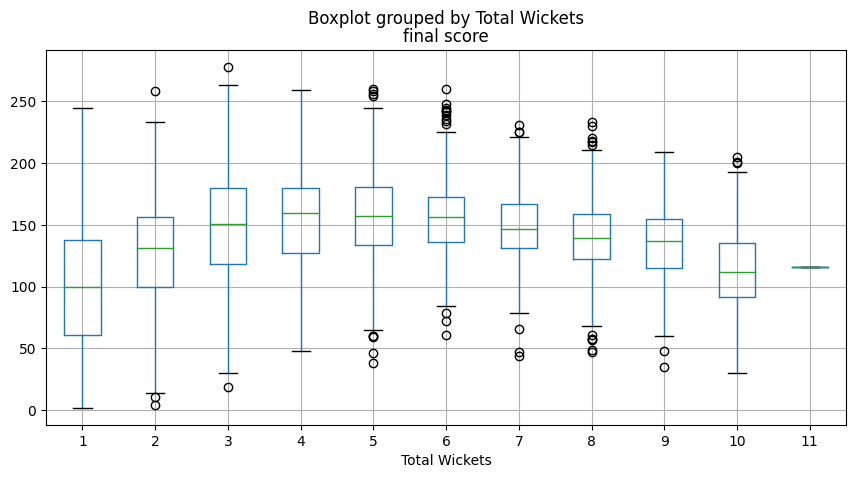

In [21]:
data_2 = match_data[["match code","country","Total Wickets","final score"]]
data_2 = data_2.groupby(["match code", "country", "final score"]).last().reset_index()
data_2.drop(columns = ["match code", "country"])
data_2.boxplot(column = "final score", by = "Total Wickets", figsize = (10, 5), vert = True)

This shows that the final score also does depend a bit on the total wickets

## Final Cleanup
Now the final score definitely depends on the current score and the current over and ball. One final thing I wanted to do was to combine the overs and ball columns before the final cleanup

In [15]:
match_data["total balls"] = match_data["over"] * 6 + match_data["ball"]
match_data = match_data[["match code", "country", "total balls", "score", "Total Wickets", "final score"]]

In [16]:
match_data.rename(columns = {"score":"current score", "Total Wickets": "total wickets"})

,match code,country,total balls,current score,total wickets,final score
0,1381452,Austria,0,0,0,121
1,1381452,Austria,1,4,0,121
2,1381452,Austria,2,4,0,121
3,1381452,Austria,3,4,0,121
4,1381452,Austria,4,5,0,121
...,...,...,...,...,...,...
407784,211048,New Zealand,115,165,8,170
407785,211048,New Zealand,116,165,9,170
407786,211048,New Zealand,117,169,9,170
407787,211048,New Zealand,118,170,9,170


## One-hot encoding for countries

In [140]:
country_names = match_data["country"].unique()
country_names = sorted(country_names)
print(country_names)
print(f"There are a total of {len(country_names)} countries")

['Afghanistan', 'Argentina', 'Australia', 'Austria', 'Bahamas', 'Bahrain', 'Bangladesh', 'Belgium', 'Belize', 'Bermuda', 'Bhutan', 'Botswana', 'Bulgaria', 'Cameroon', 'Canada', 'Cayman Islands', 'Cook Islands', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'England', 'Estonia', 'Eswatini', 'Fiji', 'Finland', 'France', 'Gambia', 'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Guernsey', 'Hong Kong', 'Hungary', 'ICC World XI', 'India', 'Indonesia', 'Iran', 'Ireland', 'Isle of Man', 'Israel', 'Italy', 'Japan', 'Jersey', 'Kenya', 'Kuwait', 'Lesotho', 'Luxembourg', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta', 'Mozambique', 'Namibia', 'Nepal', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Oman', 'Pakistan', 'Panama', 'Papua New Guinea', 'Philippines', 'Portugal', 'Qatar', 'Romania', 'Rwanda', 'Samoa', 'Saudi Arabia', 'Scotland', 'Serbia', 'Seychelles', 'Sierra Leone', 'Singapore', 'Slovenia', 'South Africa', 'South Korea', 'Spain', 'Sri Lanka', 'St Helena', 'Swaziland', 'Sweden',

In [141]:
# Do one hot encoding
data_3 = pd.get_dummies(match_data["country"]).astype(int)
data_3.head()

,Afghanistan,Argentina,Australia,Austria,Bahamas,Bahrain,Bangladesh,Belgium,Belize,Bermuda,...,Switzerland,Tanzania,Thailand,Turkey,Uganda,United Arab Emirates,United States of America,Vanuatu,West Indies,Zimbabwe
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [142]:
match_data_encoded = pd.concat([match_data,data_3], axis=1)
match_data_encoded.drop(columns = ["country"], inplace = True)
match_data_encoded

,total balls,score,Total Wickets,final score,Afghanistan,Argentina,Australia,Austria,Bahamas,Bahrain,...,Switzerland,Tanzania,Thailand,Turkey,Uganda,United Arab Emirates,United States of America,Vanuatu,West Indies,Zimbabwe
0,0,0,0,121,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,4,0,121,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,4,0,121,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,4,0,121,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,5,0,121,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407784,115,165,8,170,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
407785,116,165,9,170,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
407786,117,169,9,170,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
407787,118,170,9,170,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [143]:
# Save the data
# match_data_encoded.to_csv(r"../Resources/final_score_data.csv", index = False)

<h2>Scraping Data for countries</h2>

In [17]:
import requests
from bs4 import BeautifulSoup

In [18]:
# Scrape from this website
url = r"https://www.icc-cricket.com/rankings/mens/team-rankings/t20i"
response = requests.get(url)
html_content = response.content

In [19]:
# Parse the content
soup = BeautifulSoup(html_content, 'html.parser')
table = soup.find('table', class_ = 'table')

In [20]:
# Store the country statistics in a dictionary
country_stats = []
for row in table.find_all('tr')[1:]:
    col = row.find_all('td')

    #Extract the info
    pos = int(col[0].text.strip())
    name = col[1].find('span', class_ = 'u-hide-phablet').text.strip()
    matches = int(col[2].text.strip())
    points = int(col[3].text.strip().replace(',',''))
    rating = int(col[4].text.strip())

    country_stats.append({'position':pos,'country':name, 'matches':matches,'points':points,'rating':rating})

In [11]:
print(country_stats)

[{'position': 1, 'country': 'India', 'matches': 54, 'points': 14267, 'rating': 264}, {'position': 2, 'country': 'England', 'matches': 39, 'points': 10117, 'rating': 259}, {'position': 3, 'country': 'New Zealand', 'matches': 46, 'points': 11794, 'rating': 256}, {'position': 4, 'country': 'Pakistan', 'matches': 50, 'points': 12719, 'rating': 254}, {'position': 5, 'country': 'South Africa', 'matches': 32, 'points': 8080, 'rating': 253}, {'position': 6, 'country': 'Australia', 'matches': 31, 'points': 7681, 'rating': 248}, {'position': 7, 'country': 'West Indies', 'matches': 36, 'points': 8719, 'rating': 242}, {'position': 8, 'country': 'Sri Lanka', 'matches': 37, 'points': 8774, 'rating': 237}, {'position': 9, 'country': 'Bangladesh', 'matches': 41, 'points': 9192, 'rating': 224}, {'position': 10, 'country': 'Afghanistan', 'matches': 29, 'points': 6260, 'rating': 216}, {'position': 11, 'country': 'Zimbabwe', 'matches': 36, 'points': 7087, 'rating': 197}, {'position': 12, 'country': 'Irela

In [21]:
# Now convert this info into a dataframe
countries = pd.DataFrame(country_stats)
countries

,position,country,matches,points,rating
0,1,India,54,14267,264
1,2,England,39,10117,259
2,3,New Zealand,46,11794,256
3,4,Pakistan,50,12719,254
4,5,South Africa,32,8080,253
...,...,...,...,...,...
82,83,Eswatini,18,0,0
83,84,Seychelles,7,0,0
84,85,Samoa,9,0,0
85,86,Greece,6,0,0


In [30]:
country_data = match_data.merge(countries[['country','rating']], on = ['country'])
country_data.rename(columns={'rating':'country rating'}, inplace = True)
country_data.drop(columns = ['country'], inplace = True)
country_data

,total balls,score,Total Wickets,final score,country rating
0,0,0,0,121,58
1,1,4,0,121,58
2,2,4,0,121,58
3,3,4,0,121,58
4,4,5,0,121,58
...,...,...,...,...,...
394978,115,137,6,143,22
394979,116,141,6,143,22
394980,117,142,6,143,22
394981,118,142,7,143,22


<h2>Final Score and Country rating</h2>
Before saving the data, I have to make sure that final score does depend on the country rating.

<Axes: title={'center': 'final score'}, ylabel='country rating'>

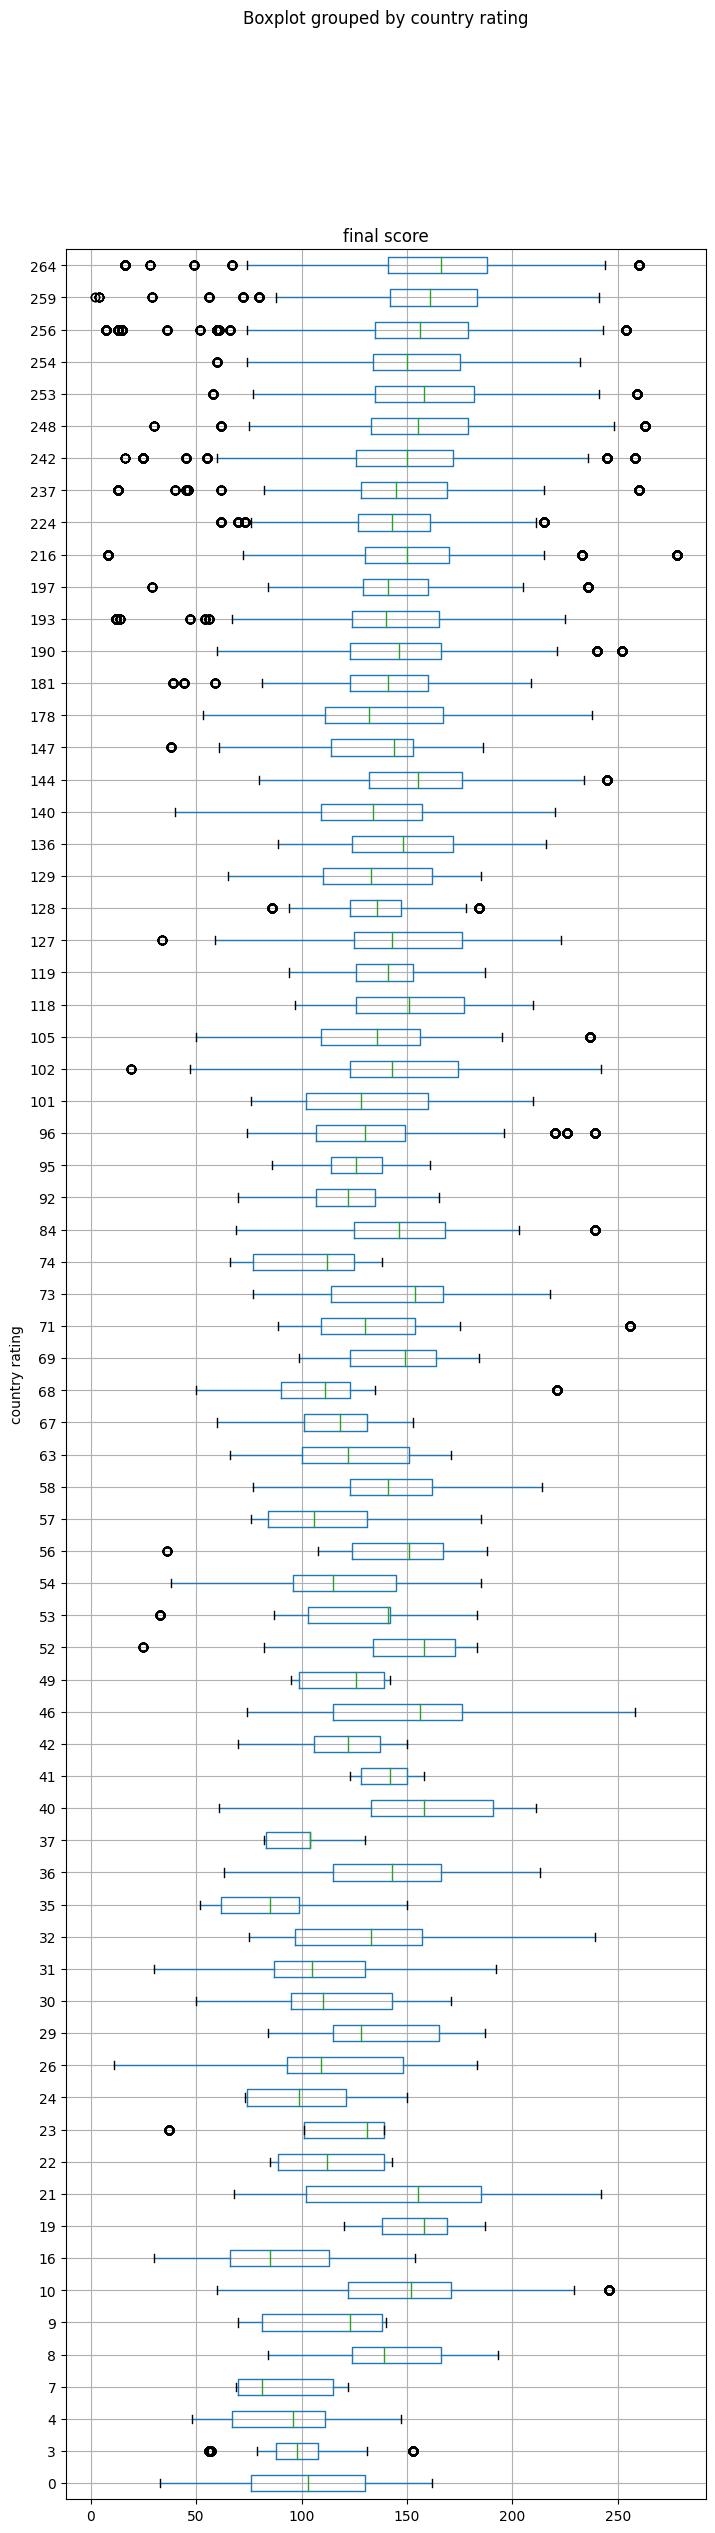

In [37]:
country_data.boxplot(column = 'final score', by = 'country rating', figsize = (8, 30),vert = False)

Well, I can see a slight relationship, but nothing conclusive.

In [38]:
# Save the data
countries.to_csv(r"../Resources/country_data.csv", index = False)
country_data.to_csv(r"../Resources/final_score_country.csv", index = False)

<h1>Data for RNN final predictor</h1>

In [92]:
rnn_data = match_data.merge(countries[['country','rating']], on = ['country'])
rnn_data.rename(columns={'rating':'country rating'}, inplace = True)
rnn_data

,match code,country,total balls,score,Total Wickets,final score,country rating
0,1381452,Austria,0,0,0,121,58
1,1381452,Austria,1,4,0,121,58
2,1381452,Austria,2,4,0,121,58
3,1381452,Austria,3,4,0,121,58
4,1381452,Austria,4,5,0,121,58
...,...,...,...,...,...,...,...
394978,1286672,Belize,115,137,6,143,22
394979,1286672,Belize,116,141,6,143,22
394980,1286672,Belize,117,142,6,143,22
394981,1286672,Belize,118,142,7,143,22


In [93]:
rnn_data.rename(columns={'total balls':'current ball', 'Total Wickets':'total wickets', 'score':'current score'}, inplace = True)
rnn_data = rnn_data.drop_duplicates(subset=['match code','country','current ball'])
rnn_data

,match code,country,current ball,current score,total wickets,final score,country rating
0,1381452,Austria,0,0,0,121,58
1,1381452,Austria,1,4,0,121,58
2,1381452,Austria,2,4,0,121,58
3,1381452,Austria,3,4,0,121,58
4,1381452,Austria,4,5,0,121,58
...,...,...,...,...,...,...,...
394978,1286672,Belize,115,137,6,143,22
394979,1286672,Belize,116,141,6,143,22
394980,1286672,Belize,117,142,6,143,22
394981,1286672,Belize,118,142,7,143,22


In [85]:
rnn_data.to_csv(r"../Resources/rnn_data.csv", index=False)

In [95]:
innings = rnn_data.groupby(['match code','country'])
# Create lists to store input sequences and target outputs
input_sequences = []
target_outputs = []

# Iterate over innings and create sequences
for inning, inning_data in innings:
    # Select relevant features for input sequence and target output
    input_features = inning_data[['current ball', 'current score', 'total wickets','country rating']].values

    # Pad or truncate sequences to length 120
    if len(input_features) >= 120:
        input_features = input_features[:120]
    else:
        input_features = np.pad(input_features, ((0, 120 - len(input_features)), (0,0)), mode='constant')

    # Get the final score for the inning
    final_score = inning_data['final score'].values[-1]
    
    # Create target output array of shape (120, 1)
    target_output = np.full((120, 1), final_score)
    
    # Append sequences to the lists
    input_sequences.append(input_features)
    target_outputs.append(target_output)

X = np.array(input_sequences)
print(X.shape)
Y = np.array(target_outputs)
print(Y.shape)

(3414, 120, 4)
(3414, 120, 1)


In [90]:
X[1]

array([[  0,   0,   0, 259],
       [  1,   1,   0, 259],
       [  2,   1,   0, 259],
       [  3,   1,   0, 259],
       [  4,   1,   0, 259],
       [  5,   2,   0, 259],
       [  6,   4,   0, 259],
       [  7,   4,   0, 259],
       [  8,   5,   0, 259],
       [  9,   5,   0, 259],
       [ 10,   5,   0, 259],
       [ 11,   5,   0, 259],
       [ 12,   6,   0, 259],
       [ 13,  11,   0, 259],
       [ 14,  11,   0, 259],
       [ 15,  15,   0, 259],
       [ 16,  19,   0, 259],
       [ 17,  20,   0, 259],
       [ 18,  20,   0, 259],
       [ 19,  24,   0, 259],
       [ 20,  28,   0, 259],
       [ 21,  28,   0, 259],
       [ 22,  28,   1, 259],
       [ 23,  29,   1, 259],
       [ 24,  30,   1, 259],
       [ 25,  32,   1, 259],
       [ 26,  36,   1, 259],
       [ 27,  37,   1, 259],
       [ 28,  38,   1, 259],
       [ 29,  39,   1, 259],
       [ 30,  40,   1, 259],
       [ 31,  43,   1, 259],
       [ 32,  48,   1, 259],
       [ 33,  49,   1, 259],
       [ 34,  

In [91]:
Y[1]

array([[179],
       [179],
       [179],
       [179],
       [179],
       [179],
       [179],
       [179],
       [179],
       [179],
       [179],
       [179],
       [179],
       [179],
       [179],
       [179],
       [179],
       [179],
       [179],
       [179],
       [179],
       [179],
       [179],
       [179],
       [179],
       [179],
       [179],
       [179],
       [179],
       [179],
       [179],
       [179],
       [179],
       [179],
       [179],
       [179],
       [179],
       [179],
       [179],
       [179],
       [179],
       [179],
       [179],
       [179],
       [179],
       [179],
       [179],
       [179],
       [179],
       [179],
       [179],
       [179],
       [179],
       [179],
       [179],
       [179],
       [179],
       [179],
       [179],
       [179],
       [179],
       [179],
       [179],
       [179],
       [179],
       [179],
       [179],
       [179],
       [179],
       [179],
       [179],
      